In [109]:
%load_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import pandas as pd
import plankton as pla
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import os

In [3]:
data_folder='data/HCAPancreas/'

coordinates = pd.read_csv(os.path.join(data_folder,'coordinates.csv'))
signatures = pd.read_csv(os.path.join(data_folder,'signatures_original.csv'),index_col=0)


In [4]:
# adata = sc.read_h5ad('/home/sebastian/data/Placenta_normalized_Seurat_markers.h5ad')
# bg = pla.PixelMap(np.load('bg.npy').T,upscale=0.2)


In [12]:
sdata.props.assign_colors('celltype')

,genes,c_genes,celltype,c_celltype
ABCC8,ABCC8,"(0.4889, 0.0, 0.5555333333333333, 1.0)",Beta,"(0.4889, 0.0, 0.5555333333333333, 1.0)"
ACTA2,ACTA2,"(0.4993470588235294, 0.0, 0.5659960784313726, ...",Quiescent Stellate,"(0.17776666666666668, 0.0, 0.6444666666666666,..."
ADIRF,ADIRF,"(0.5097941176470588, 0.0, 0.5764588235294118, ...",Quiescent Stellate,"(0.17776666666666668, 0.0, 0.6444666666666666,..."
AMY2A,AMY2A,"(0.5202411764705882, 0.0, 0.5869215686274509, ...",Acinar-i,"(0.0, 0.0, 0.8667, 1.0)"
ANXA4,ANXA4,"(0.525464705882353, 0.0, 0.5921529411764705, 1.0)",Ductal,"(0.0, 0.5111333333333333, 0.8667, 1.0)"
...,...,...,...,...
VCAN,VCAN,"(0.8, 0.42352941176470593, 0.42352941176470593...",Acinar-i,"(0.0, 0.0, 0.8667, 1.0)"
VPREB3,VPREB3,"(0.8, 0.48627450980392156, 0.48627450980392156...",B cell,"(0.0, 1.0, 0.0, 1.0)"
VWF,VWF,"(0.8, 0.611764705882353, 0.611764705882353, 1.0)",Endothelial,"(0.0, 0.6667, 0.5333, 1.0)"
ZEB2,ZEB2,"(0.8, 0.7372549019607844, 0.7372549019607844, ...",MHC Class II,"(0.0, 0.8222333333333334, 0.0, 1.0)"


In [14]:

sdata = pla.SpatialData(coordinates.gene, 
                       coordinates.X, 
                       coordinates.Y,)

sdata.props["celltype"] = signatures.index[np.array(signatures).argmax(0)]
sdata.props.assign_colors('celltype')

<IPython.core.display.Javascript object>


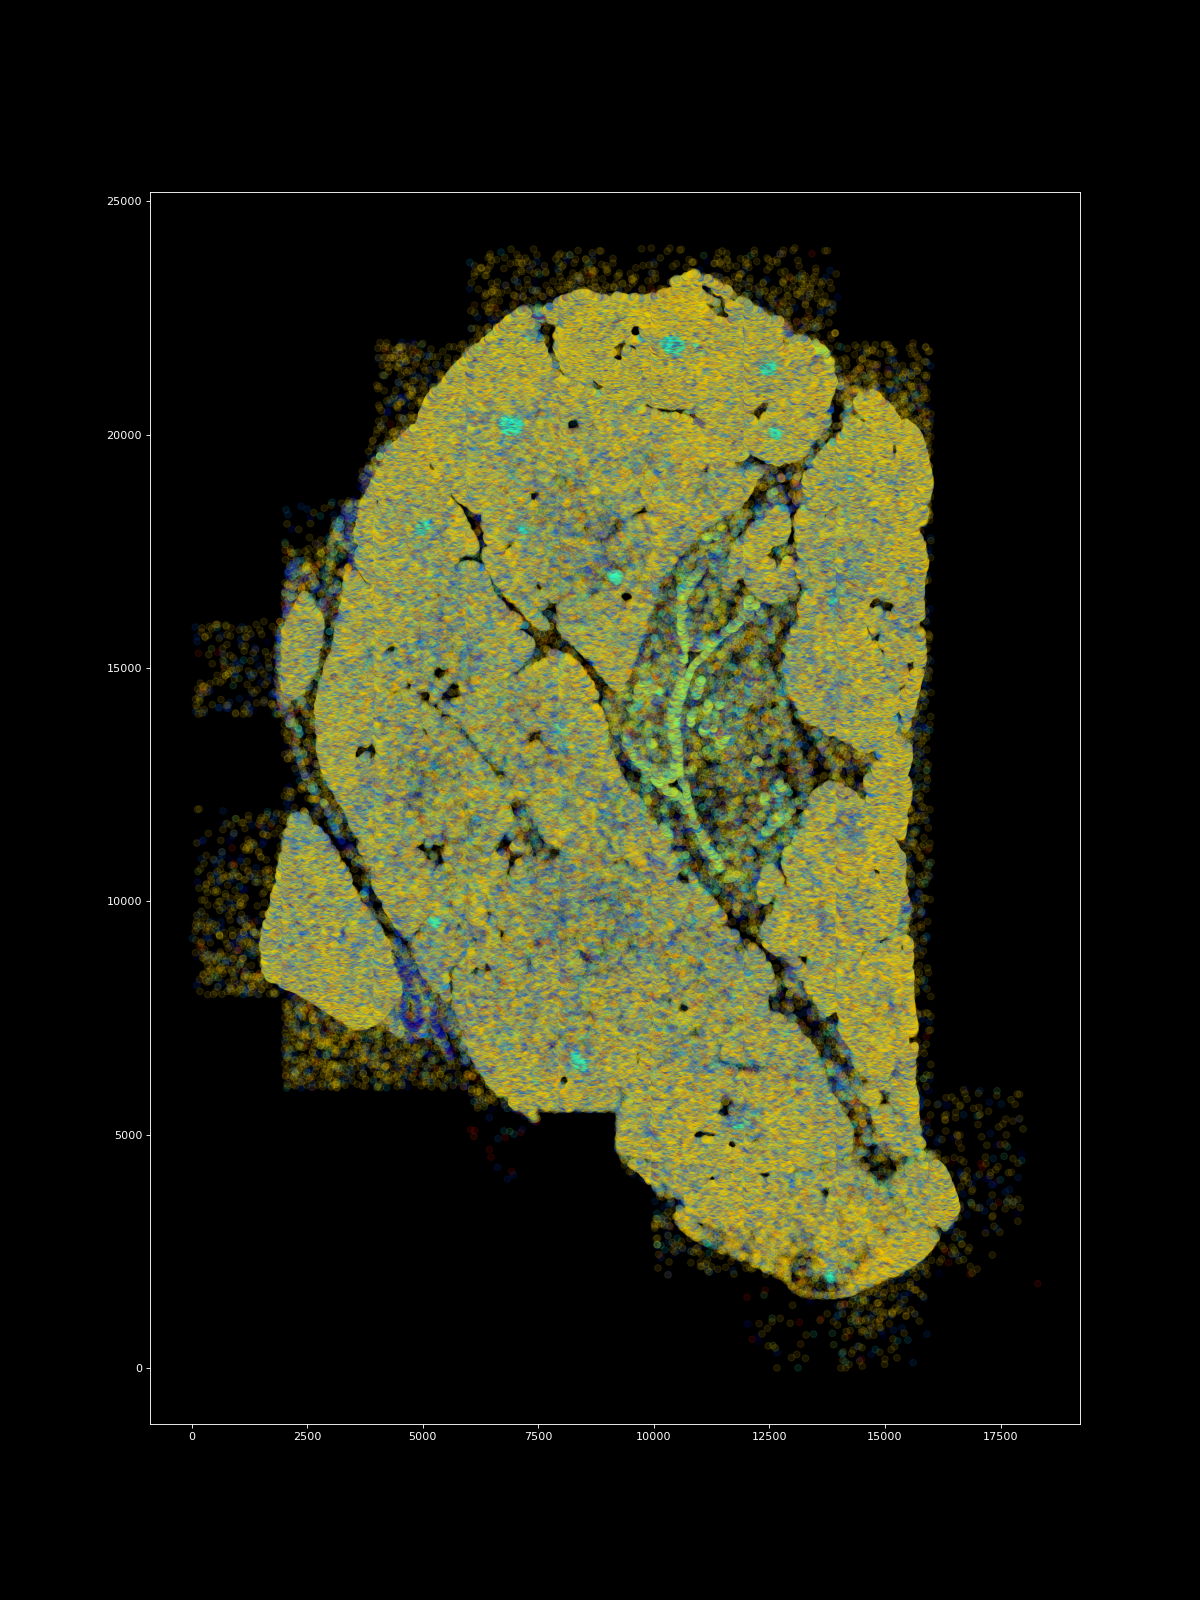

In [15]:
plt.figure(figsize=(15,20))
sdata.scatter(c = sdata.gene_ids,alpha=0.1)

In [22]:
knn_neighbors=200
bandwidth=50
n_neighbors=30
metric='euclidean'
min_dist=0.0
random_state=42
zero_weight=4.0

_=sdata.graph.update_knn(n_neighbors=knn_neighbors)

sdata.graph.run_umap(bandwidth=bandwidth,n_neighbors=n_neighbors, min_dist=min_dist, metric=metric, random_state=random_state,zero_weight=zero_weight)


<IPython.core.display.Javascript object>


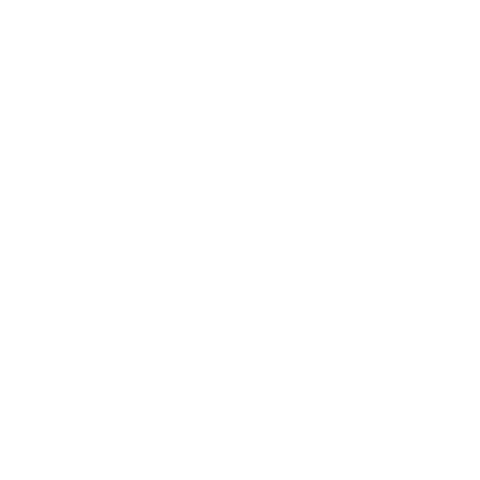

In [23]:
# for n_neighbors in (12,20,50,120):
#     for disc in (1.2,1,0.8,0.5,0.3,):

# disc = 0.2
# n_neighbors = 100
# sdata.graph.update_knn(n_neighbors=130)
# sdata.graph.run_umap(bandwidth=10,n_neighbors=n_neighbors)

plt.figure(figsize=(6,6))
sdata.graph.plot_umap(  alpha=0.1,cmap='nipy_spectral',marker='x')

# plt.savefig(f'./output/luca-umap-{disc}-{n_neighbors}.png')

<IPython.core.display.Javascript object>


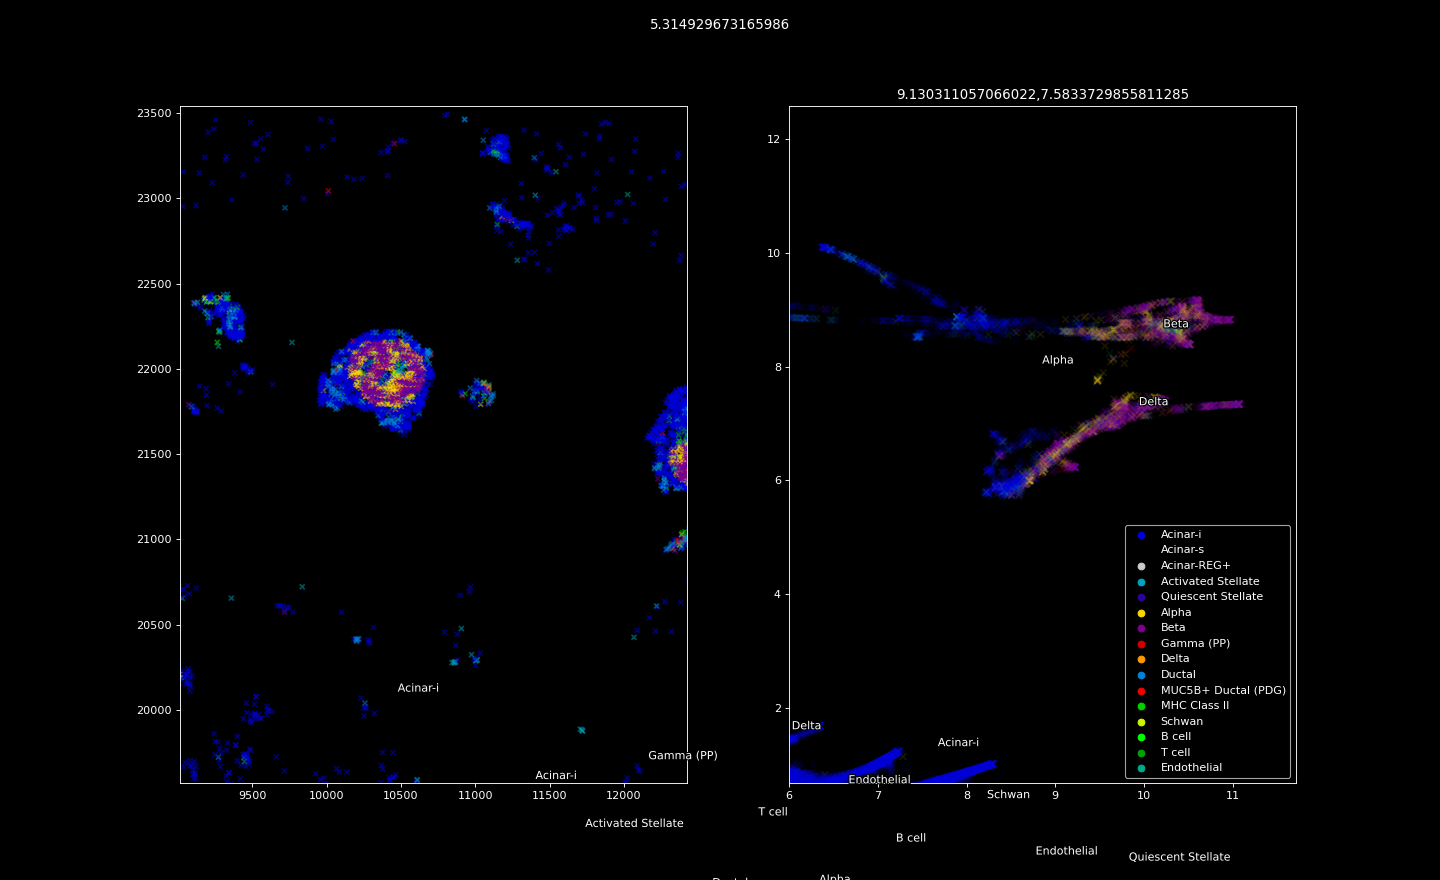

In [110]:
%matplotlib notebook

from matplotlib.backend_bases import MouseButton

click_coords=np.array((0.0,0.0))

plt.style.use('dark_background')

fig = plt.figure(figsize=(18,11))

radius=10
colors = np.repeat([(0,1,0,1)],len(sdata),axis=0)

ax1=plt.subplot(121)
sdata[:0].scatter(alpha=0.9,cmap='autumn',marker='x', axd=ax1)
sc1 = ax1.scatter(*sdata.coordinates,c=sdata.props.project('c_celltype'),marker='x',alpha=0.005,s=[0]*len(sdata))
sc2 = ax1.scatter(*sdata.coordinates,c=sdata.props.project('c_celltype'),marker='x',alpha=0.5,s=[10]*len(sdata))

ax2=plt.subplot(122)
sdata.graph.plot_umap(color_prop='celltype', text_prop='celltype', alpha=0.1, text_distance=1,marker='x',thlds_text=(0.2,0.0,0),text_kwargs={'fontsize':10})

circle=plt.Circle((0,0),radius, color='w',fill=False, linestyle='--')
ax2.add_artist(circle)

def on_click(event):
    click_coords[0]=event.xdata
    click_coords[1]=event.ydata
    
def on_release(event):
    center = np.array((event.xdata,event.ydata))
    if all(click_coords==center):
        ax2.set_title(f'{event.xdata},{event.ydata}')
        circle.set_center(center)
        
        dist = ((sdata.graph.umap-center)**2).sum(1)**0.5
        
        
        circle.radius=radius
        sc1._sizes[dist<radius]=0
        sc1._sizes[dist>radius]=3
        
        sc2._sizes[dist<radius]=20
        sc2._sizes[dist>radius]=0
                
        fig.canvas.draw()
        
        
           
plt.connect('button_press_event', on_click)
plt.connect('button_release_event', on_release)
    
colors_reordered = [sdata.props[sdata.props['celltype']==i].iloc[0].c_celltype if i in sdata.props.celltype.values else (0.0,0.0,0.0,0.0) for i in signatures.index]
plt.legend([plt.scatter([],[],color=c) for c in colors_reordered],signatures.index)

In [119]:
radius=8

In [ ]:
plt.figure(figsize=(15,15))
sdata.graph.plot_umap(text_column='celltype',color_category='celltype', alpha=0.1,cmap='nipy_spectral',marker='x')

In [ ]:
plt.figure(figsize=(15,20))
plt.title('Colored by UMAP-vertcal position')
sdata.scatter(c = sdata.graph.umap[:,1],alpha=0.1,cmap='bwr')

In [ ]:
plt.figure(figsize=(15,20))
plt.title('colored by UMAP horizontal position')
sdata.scatter(c = -sdata.graph.umap[:,0],alpha=0.1,cmap='bwr')

In [ ]:
assert False

In [ ]:
sdata.graph.update_knn(n_neighbors=100)
sdata.graph.run_tsne(bandwidth=80,)

In [ ]:
plt.figure(figsize=(15,15))
sdata.graph.plot_tsne(text_column='celltype',color_category='celltype', alpha=0.1,cmap='viridis',marker='x')

In [ ]:
dist_from_center = ((sdata.x-1000)**2+(sdata.y-2000)**2)**0.5

sdata.scatter(c=dist_from_center)

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(*sdata.graph._umap.T, c=dist_from_center, alpha=0.1, cmap='nipy_spectral')

In [ ]:
plt.figure(figsize=(21,21))
sdata.graph.plot_umap(alpha=0.01)